In [1]:
# General Library
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Import training data

In [2]:
df=pd.read_csv("train_MpHjUjU.csv",skipinitialspace=True,dayfirst=True, parse_dates=['Dateofjoining','MMM-YY','LastWorkingDate'])
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1


### we observed that there is mutiple recored againts every employee id , so we need to create one recored every employee

In [3]:
# Create  some new feature like salary_min,salay_max,rating min,max,mean 

index_col=["Emp_ID",'Gender','City','Education_Level','Dateofjoining']
df_train=df.groupby(index_col).agg({'Age':'min',
                           'Salary':['min','max'],
                           'LastWorkingDate':'max',
                           'Joining Designation':"min",
                          'Designation':'min',
                          'Total Business Value':['mean'],
                        'Quarterly Rating':['min','max','mean']}).reset_index()
df_train.columns = ['_'.join(col) for col in df_train.columns]
df_train.head()

,Emp_ID_,Gender_,City_,Education_Level_,Dateofjoining_,Age_min,Salary_min,Salary_max,LastWorkingDate_max,Joining Designation_min,Designation_min,Total Business Value_mean,Quarterly Rating_min,Quarterly Rating_max,Quarterly Rating_mean
0,1,Male,C23,Master,2015-12-24,28,57387,57387,2016-03-11,1,1,571860.0,2,2,2.0
1,2,Male,C7,Master,2017-11-06,31,67016,67016,NaT,2,2,0.0,1,1,1.0
2,4,Male,C13,Master,2016-12-07,43,65603,65603,2017-04-27,2,2,70000.0,1,1,1.0
3,5,Male,C9,College,2016-01-09,29,46368,46368,2016-03-07,1,1,40120.0,1,1,1.0
4,6,Female,C11,Bachelor,2017-07-31,31,78728,78728,NaT,3,3,253000.0,1,2,1.6


In [4]:
# Create Target variable
df_train['Target']=df_train['LastWorkingDate_max'].apply(lambda x : 0 if x is pd.NaT else 1 )

In [5]:
df_train.info()

# except LastWorkingDate_max there is no null value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Emp_ID_                    2381 non-null   int64         
 1   Gender_                    2381 non-null   object        
 2   City_                      2381 non-null   object        
 3   Education_Level_           2381 non-null   object        
 4   Dateofjoining_             2381 non-null   datetime64[ns]
 5   Age_min                    2381 non-null   int64         
 6   Salary_min                 2381 non-null   int64         
 7   Salary_max                 2381 non-null   int64         
 8   LastWorkingDate_max        1616 non-null   datetime64[ns]
 9   Joining Designation_min    2381 non-null   int64         
 10  Designation_min            2381 non-null   int64         
 11  Total Business Value_mean  2381 non-null   float64       
 12  Quarte

### Exploratory Data Analysis

Text(0.5, 1.0, 'Target wise count plot')

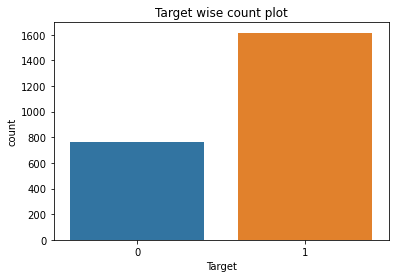

In [6]:
sns.countplot(df_train.Target)
plt.title('Target wise count plot')

### Dateset is imblance 

Text(0.5, 1.0, 'Gender wise Target value')

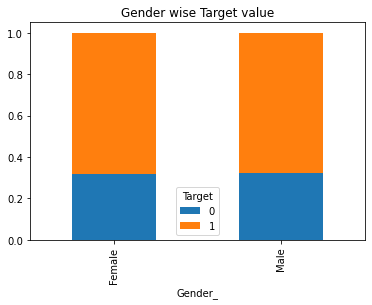

In [7]:
pd.crosstab(index=df_train['Gender_'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)

plt.title('Gender wise Target value')

#### We have observe that almost similar % of Attrition in male and female

Text(0.5, 1.0, 'Education wise Target value')

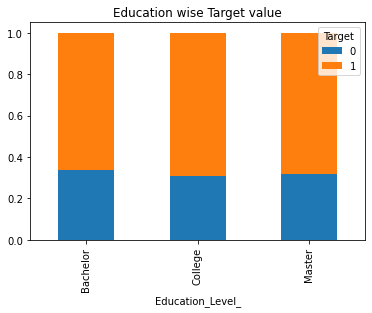

In [8]:
pd.crosstab(index=df_train['Education_Level_'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)

plt.title('Education wise Target value')

#### similar observe that  % of Attrition are same across education level

Text(0.5, 1.0, 'City wise Target value')

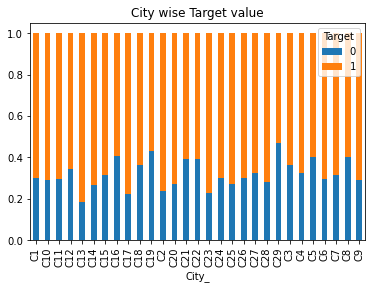

In [16]:

pd.crosstab(index=df_train['City_'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)
plt.title('City wise Target value')

##### Some of the city has higer % of attrition rate like C19,C29,C5,C8,C12 C21,C22 than other city

Create new varibale base on above observation

Text(0.5, 1.0, 'City category wise Target value')

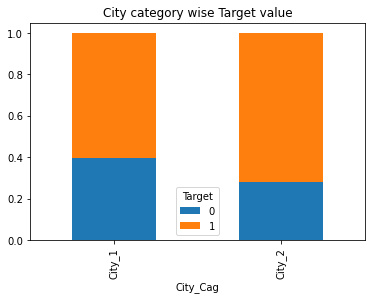

In [17]:
city=['C12','C16','C18','C19','C21','C22','C29','C3','C5','C8']
df_train['City_Cag']=df_train['City_'].apply(lambda x: "City_1" if x in city else "City_2")
pd.crosstab(index=df_train['City_Cag'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)
plt.title('City category wise Target value')

#### New city category variable we obser that city_1 category have higher Attrition rate

Text(0.5, 1.0, 'Joinig month  wise Target value')

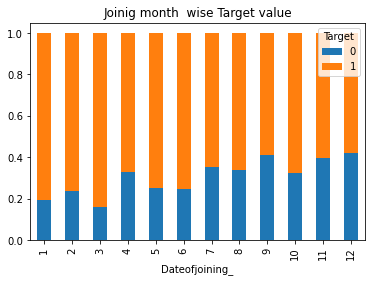

In [18]:
pd.crosstab(index=df_train['Dateofjoining_'].dt.month,
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)
plt.title('Joinig month  wise Target value')

### above graph we observe that employee attrition rate is people join company in scond half of the year

Text(0.5, 1.0, 'Age  wise Target value')

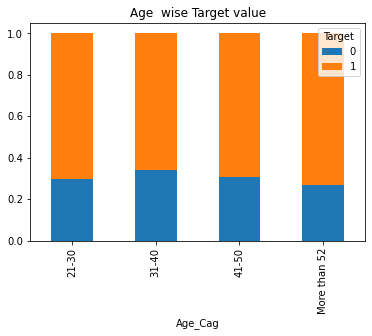

In [19]:
df_train['Age_Cag']=df_train['Age_min'].apply(lambda x: "21-30" if x<=30 else "31-40" if x<=40 else "41-50" if x<=50 else 'More than 52') 
pd.crosstab(index=df_train['Age_Cag'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)
plt.title('Age  wise Target value')

##### Across the age bucket same number % of attration rate observed

Text(0.5, 1.0, 'Designation  wise Target value')

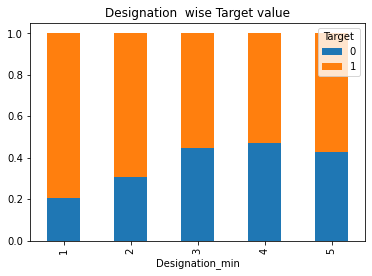

In [20]:
pd.crosstab(index=df_train['Designation_min'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)
plt.title('Designation  wise Target value')

### senior level employe % leaveing compay is higher compair to junior leve

Text(0.5, 1.0, 'Designation  wise Target value')

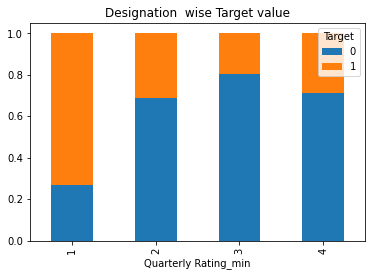

In [21]:
pd.crosstab(index=df_train['Quarterly Rating_min'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True)
plt.title('Designation  wise Target value')

#### Low rating  employee leave organization

Text(0.5, 1.0, 'vinatge  wise Target value')

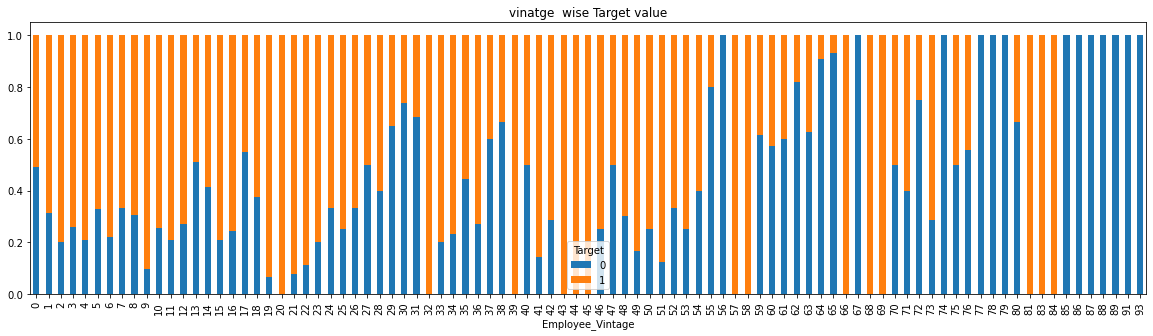

In [22]:
### Creaet empoyee vintage in organization

#Fill LastWorkingDate_max nan value with 2018-01-01 date

df_train['LastWorkingDate_max'].replace(pd.NaT,dt.datetime(2018,1,1),inplace=True)

df_train["Employee_Vintage"]=((df_train['LastWorkingDate_max']-df_train['Dateofjoining_'])/np.timedelta64(1,"M")).astype('int')

pd.crosstab(index=df_train['Employee_Vintage'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True,figsize=(20,5) )


plt.title('vinatge  wise Target value')

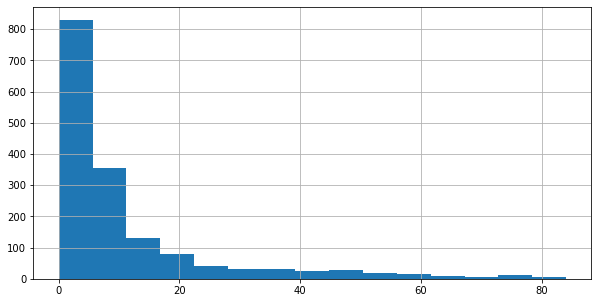

In [40]:
plt.figure(figsize=(10,5))
df_train[df_train['Target']==1]['Employee_Vintage'].hist(bins=15)

#### we observe that as age employee vintage increase  attration rate is decrease and majority employe leave the compnay with in year

In [23]:
# Creating new varibale last 3 month mean rating

Emp_id=df['Emp_ID'].unique().tolist()

Last_3_M_Rating={}

for i in Emp_id: 
    a=df[(df['Emp_ID']==i)]
    b=a[a['MMM-YY']>=a['MMM-YY'].max()-dt.timedelta(days=60)]['Quarterly Rating'].mean()
    Last_3_M_Rating[i]=int(b)

df_train["Last_3_M_Rating"]=df_train['Emp_ID_'].map(Last_3_M_Rating)

Text(0.5, 1.0, 'Last 3M mean rating  wise Target value')

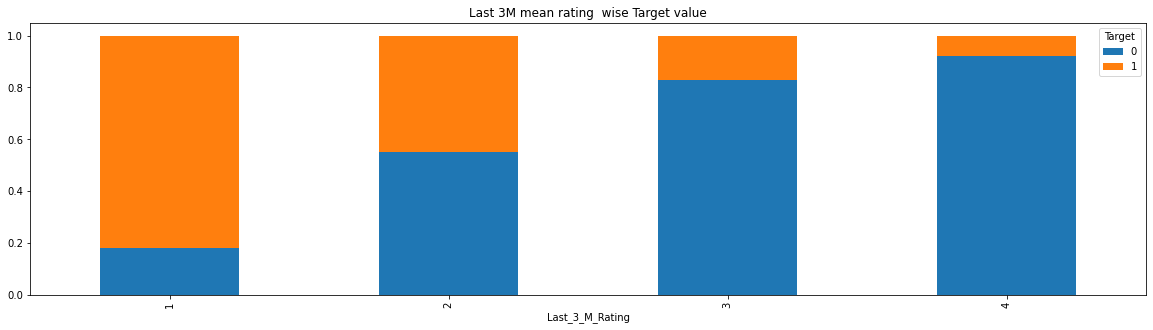

In [115]:
pd.crosstab(index=df_train['Last_3_M_Rating'],
                             columns=df_train['Target'],
                             normalize="index").plot(kind='bar',mark_right = True,stacked = True,figsize=(20,5) )


plt.title('Last 3M mean rating  wise Target value')

##### We observe that newaly create feature so higher correlation with target value and low rating emaployee attreation rate is higher

In [24]:
# Creating new varibale last 3 month mean sales
Last_3_M_Business={}

for i in Emp_id: 
    a=df[(df['Emp_ID']==i)]
    b=a[a['MMM-YY']>=a['MMM-YY'].max()-dt.timedelta(days=60)]['Total Business Value'].mean()
    Last_3_M_Business[i]=int(b)
    
df_train['Last_3_M_Business']=df_train['Emp_ID_'].map(Last_3_M_Business)

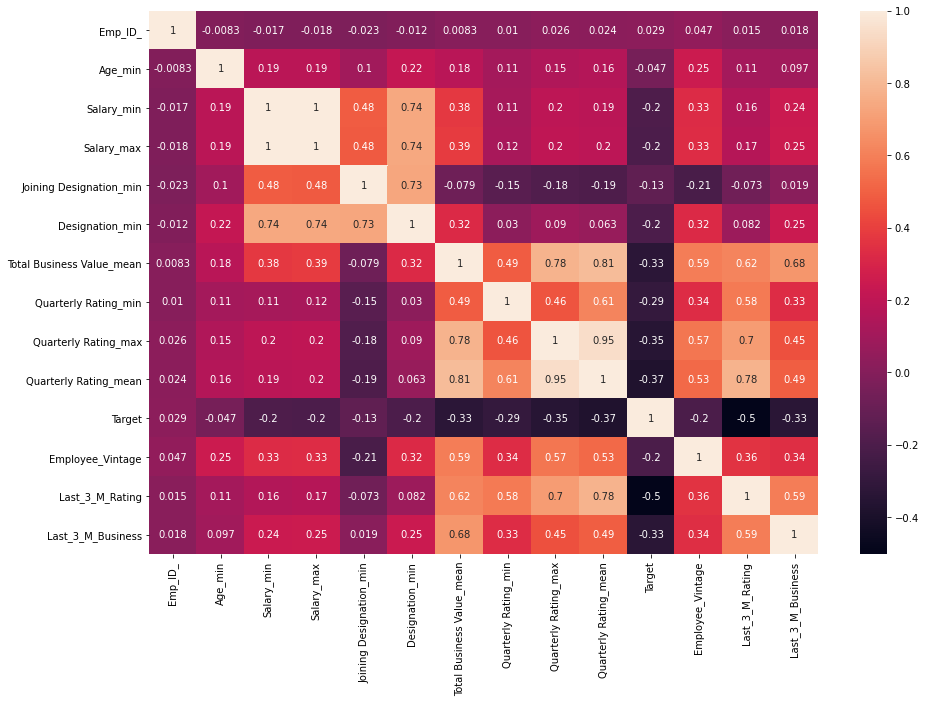

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)

1.Above graph we observe that <b>Last 3_m_rating ,last_3_M_Business </b> are negativity correlated

2.Desigation and salary is highly correlate 

In [143]:
###Based on EDA set final train datadrame and save in to csv file for for modeling

In [142]:
df_train=df_train[['Emp_ID_','Designation_min','Target','City_Cag','Month_join','Employee_Vintage','Last_3_M_Rating','Last_3_M_Business']]
df_train.to_csv('Train.csv',index=False)